# Exploratory Data Analysis

In [5]:
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#computer vision library
import cv2

#glob
from glob import glob #to read the files

In [6]:
#extracte path of male and female in crop_data folder and put them in a list

fpath = glob('crop_data/female/*.jpg')
mpath = glob('crop_data/male/*.jpg')

In [11]:
df_female = pd.DataFrame(fpath, columns=['fullpath']) #columns name is fullpath means full path of the image
df_female['gender'] = 'female'

df_male = pd.DataFrame(mpath, columns=['fullpath']) #columns name is fullpath means full path of the image
df_male['gender'] = 'male'

df = pd.concat((df_female,df_male), axis=0)
df.head()

,fullpath,gender
0,crop_data/female\female_0.jpg,female
1,crop_data/female\female_1.jpg,female
2,crop_data/female\female_100.jpg,female
3,crop_data/female\female_1002.jpg,female
4,crop_data/female\female_1005.jpg,female


In [19]:
print(df.shape)

(4761, 2)


In [20]:
#it will take each image path
#then return width of the image
def get_size(fullpath):
    img = cv2.imread(fullpath)
    return img.shape[0]

In [21]:
df['dimmension'] = df['fullpath'].apply(get_size) #store the width of the image in dimmension column(image are square so width=height)

In [22]:
df.head()

,fullpath,gender,dimmension
0,crop_data/female\female_0.jpg,female,273
1,crop_data/female\female_1.jpg,female,182
2,crop_data/female\female_100.jpg,female,122
3,crop_data/female\female_1002.jpg,female,122
4,crop_data/female\female_1005.jpg,female,182


In [23]:
dist_gender = df['gender'].value_counts()
dist_gender

gender
female    2586
male      2175
Name: count, dtype: int64

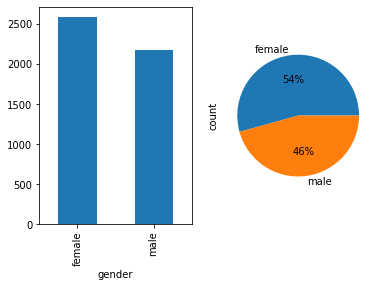

In [27]:
fig,ax = plt.subplots(nrows=1, ncols=2)
dist_gender.plot(kind='bar',ax=ax[0])
dist_gender.plot(kind='pie',ax=ax[1],autopct='%0.0f%%')
plt.show()